# Lab 3

**Due Date**: 2/7/25 by 8pm on Canvas

## Installing Libraries

Machine learning in Python has a plethora of popularly used libraries. We can install these library packages within the Jupyter Notebooks itself. Just run the cell below and it should download and install them to your computer. You only need to run this cell one time. After the package has been installed, feel free to change the cell type below from "Code" to "Raw" so it doesn't run this again.

In [1]:
import sys
!{'"' + sys.executable + '"'} -m pip install matplotlib
!{'"' + sys.executable + '"'} -m pip install numpy
!{'"' + sys.executable + '"'} -m pip install scikit-learn

## Imports

In [1]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Dataset

We will need a dataset for our ML algorithm to train on. In this section, we will generate a random dataset, split it into 3 separate subsets, and visualize our data.

### Generate Random Dataset

To generate a random dataset, we will use the ever popular numpy library. The function `generate_binary_classification_data` takes care of creating the data for you. However, you will need to call the function yourself and save its output to two variables.

In [3]:
def generate_binary_classification_data(num_samples, num_features, separation=1.0):
    """
    Generates a random dataset for binary classification using NumPy.

    Args:
        num_samples: The total number of data points (must be even).
        num_features: The number of features.
        separation: Controls the separation between the two classes. Higher values mean better separation.

    Returns:
        X: A NumPy array of shape (num_samples, num_features) containing the features.
        y: A NumPy array of shape (num_samples,) containing the binary labels (0 and 1).
    """

    if num_samples % 2 != 0:
        raise ValueError("num_samples must be an even number for binary classification.")

    half_samples = num_samples // 2

    # Generate data for label 0
    X0 = np.random.normal(loc=-separation/2, scale=1.0, size=(half_samples, num_features))
    y0 = np.zeros(half_samples)

    # Generate data for label 1
    X1 = np.random.normal(loc=separation/2, scale=1.0, size=(half_samples, num_features))
    y1 = np.ones(half_samples)

    # Combine the data for both labels
    X = np.concatenate((X0, X1), axis=0)
    y = np.concatenate((y0, y1))

    # Shuffle the data (important for training)
    permutation = np.random.permutation(num_samples)
    X = X[permutation]
    y = y[permutation]

    return X, y


# TODO: call the function and save the results to X and y
# (use 2 for the number of features so our data is 2D)
x_val, y_val = generate_binary_classification_data(100, 2, separation=1.0)

## Visualize the Dataset

It's important to visualize our dataset so we have an image in our mind as we decide on which ML algorithm may be applicable. We will use the matplotlib library to create a graph of our data. The `visualize_data` function handles the logic, but does assume that the data being based on is 2D. You will need to call this function on the dataset you generated above.

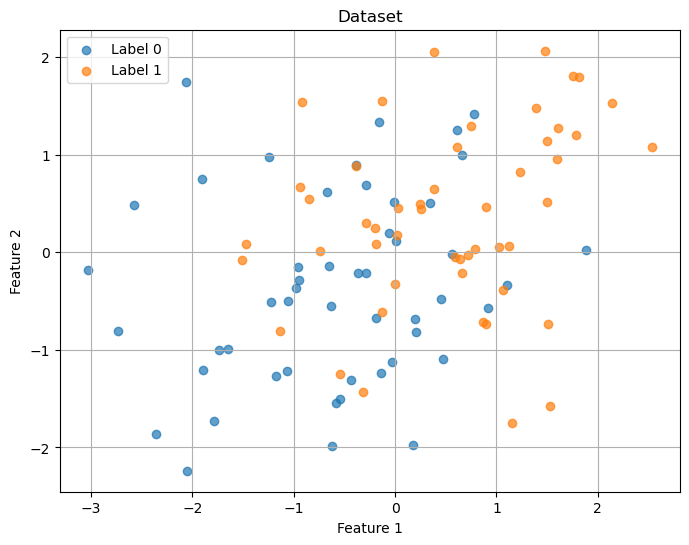

In [5]:
def visualize_data(X, y, title='Dataset'):
    """Visualizes 2D data with binary labels.

    This function creates a scatter plot of 2D data points, where each point
    is colored according to its binary label (0 or 1).

    Args:
        X: A NumPy array of shape (n_samples, 2) representing the feature data.
           Each row corresponds to a data point, and the two columns represent
           the two features.
        y: A NumPy array of shape (n_samples,) representing the binary labels
           (0 or 1) for each data point.
        title: A string representing the title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Label 0', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Label 1', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)


# TODO: call the function on your dataset
visualize_data(x_val, y_val, title='Dataset')

### Split Dataset

As we discussed, it is important to split our dataset into training, validation, and test sets. Let's assume we are using an 80/10/10 split for this. The scikit-learn library has a function called `train_test_split` that will be able to take a given dataset and split it accordingly. Read the documentation on that function and use it to create the three sets. Then, visualize each set using the `visualize_data` function from earlier.

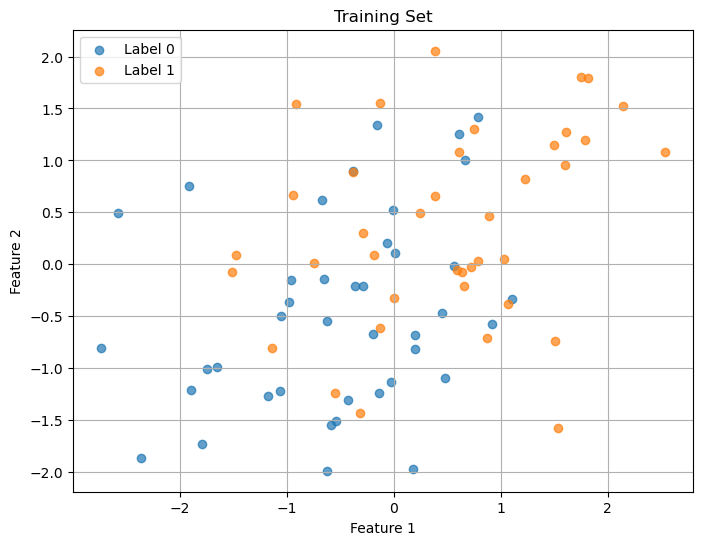

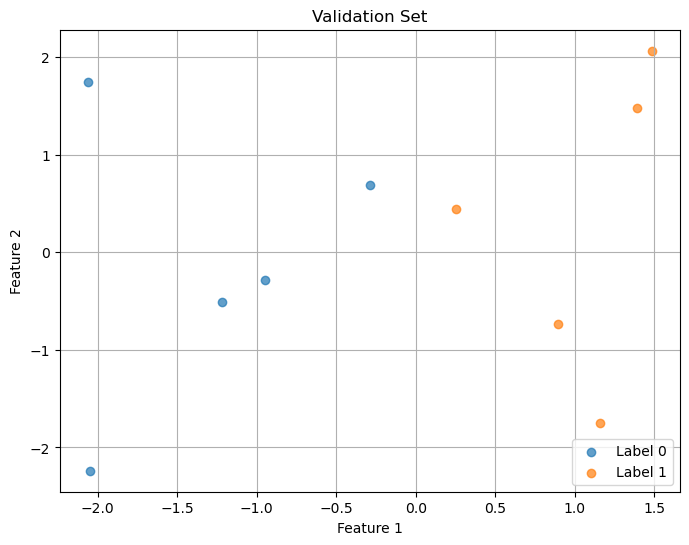

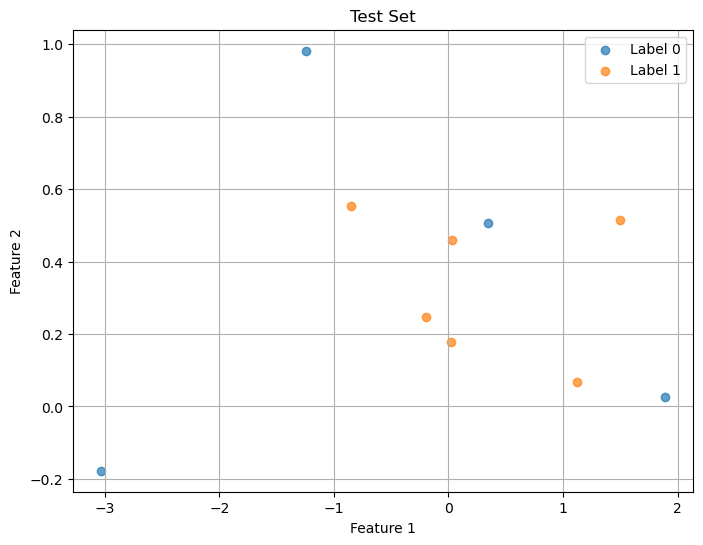

In [13]:
# TODO: use the `train_test_split` function to split your dataset into the 3 subsets
X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, train_size=0.8, random_state=42)
X_value, X_test2, y_value, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# TODO: call the `visualize_data` function on your subsets
visualize_data(X_train, y_train, title='Training Set')
visualize_data(X_value, y_value, title='Validation Set')
visualize_data(X_test2, y_test2, title='Test Set')

## $k$-NN Classifier

Let's go ahead and use the $k$-Nearest Neighbor algorithm on our data. Once again, the scikit-learn library comes to our rescue, as they already have a `KNeighborsClassifier` ready to use. Read the documentation to create various $k$-NN models on the training data, including trying various neighbor sizes, `p` values, and `metric` choices.

In [17]:
# create a 1-NN model using Euclidean distance (p=2)
knn_model_1_eucl = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
pred_knn_1_eucl = knn_model_1_eucl.predict(x_val)

# TODO: create various other k-NN models

# 5-NN using Manhattan distance (p=1)
knn_model_5_manhattan = KNeighborsClassifier(n_neighbors=5, p=1).fit(X_train, y_train)
pred_knn_5_manhattan = knn_model_5_manhattan.predict(x_val)

# 7-NN using Chebyshev distance
knn_model_7_chebyshev = KNeighborsClassifier(n_neighbors=7, metric='chebyshev').fit(X_train, y_train)
pred_knn_7_chebyshev = knn_model_7_chebyshev.predict(x_val)

### Visualize $k$-NN

With our models "trained" (but not really), let's visualize what they came up with. Call the `plot_decision_boundary` function on the models you created in the previous cell and review what kind of decision boundaries are being created.

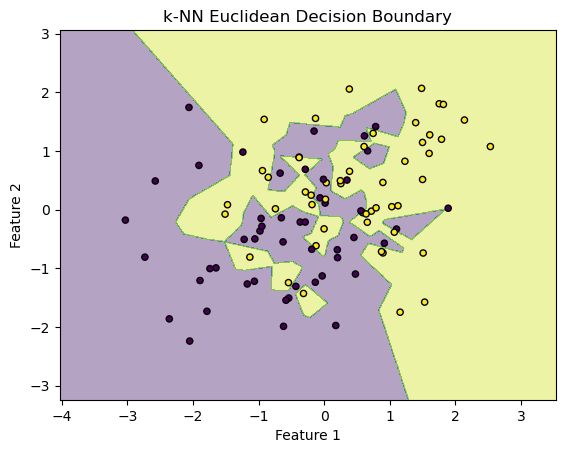

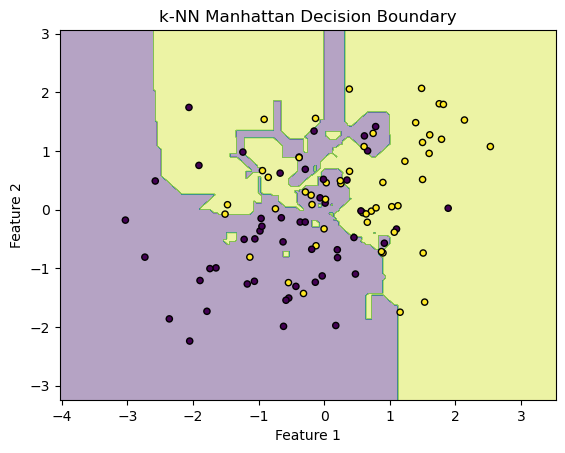

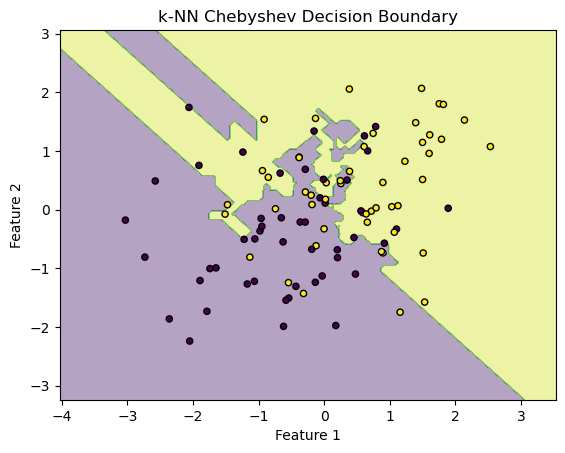

None
None
None


In [27]:
def plot_decision_boundary(X, y, model, title="k-NN Decision Boundary"):
    """
    Plots the decision boundary of a k-NN classifier.

    Args:
        X: The feature data (NumPy array).
        y: The labels (NumPy array).
        model: A k-NN model.
        title: The title of the plot.
    """

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # Use contourf to fill regions
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


# TODO: plot decision boundary for different k-NN models
kNN_eucli = plot_decision_boundary(x_val, y_val, knn_model_1_eucl, title="k-NN Euclidean Decision Boundary")
kNN_manhattan = plot_decision_boundary(x_val, y_val, knn_model_5_manhattan, title="k-NN Manhattan Decision Boundary")
kNN_cheb = plot_decision_boundary(x_val, y_val, knn_model_7_chebyshev, title="k-NN Chebyshev Decision Boundary")


## Metrics

Finally, we should run metric tests on our various k-NN models to see how well they fared. You will need to calculate the accuracy, error rate, confusion matrix, precision, recall, and $f_1$-score. Use the `score` function on your $k$-NN models to compute the accuracy. The scikit-learn library has functions for the others, namely: `confusion_matrix`, `precision_score`, `recall_score`, and `f1_score`. Use these to calculate those metric values for your models.

In [34]:
# TODO: compute various metrics on your k-NN models
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = {
    "1-NN Euclidean": pred_knn_1_eucl,
    "5-NN Manhattan": pred_knn_5_manhattan,
    "7-NN Chebyshev": pred_knn_7_chebyshev
}

# Iterate over models to compute metrics
for model_name, preds in models.items():
    acc = accuracy_score(y_val, preds)
    # Error rate = 1 - Accuracy
    err = 1 - acc  
    conf_matrix = confusion_matrix(y_val, preds)
    precision = precision_score(y_val, preds, average="weighted")
    recall = recall_score(y_val, preds, average="weighted")
    f1 = f1_score(y_val, preds, average="weighted")

    print(f"\n Metrics for {model_name}:")
    print(f"   - Accuracy: {acc:.4f}")
    print(f"   - Error Rate: {err:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1 Score: {f1:.4f}")
    print(f"   - Confusion Matrix:\n{conf_matrix}")



 Metrics for 1-NN Euclidean:
   - Accuracy: 0.9400
   - Error Rate: 0.0600
   - Precision: 0.9407
   - Recall: 0.9400
   - F1 Score: 0.9400
   - Confusion Matrix:
[[46  4]
 [ 2 48]]

 Metrics for 5-NN Manhattan:
   - Accuracy: 0.7500
   - Error Rate: 0.2500
   - Precision: 0.7627
   - Recall: 0.7500
   - F1 Score: 0.7469
   - Confusion Matrix:
[[43  7]
 [18 32]]

 Metrics for 7-NN Chebyshev:
   - Accuracy: 0.6900
   - Error Rate: 0.3100
   - Precision: 0.6907
   - Recall: 0.6900
   - F1 Score: 0.6897
   - Confusion Matrix:
[[36 14]
 [17 33]]
